In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [39]:
# Cargar el dataset que contiene la información de USA
dataset = pd.read_csv('data/result.csv')
dt2 = pd.read_csv('data/us_covid19_daily.csv')



dataset["Zone"] = dataset["Zone"].fillna('')
dataset["Province/State"] = dataset["Province/State"].fillna('')
dataset = dataset.drop(['Lat', 'Long'], axis=1)

dt2.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200615,56,2103549,21881043.0,1619.0,27115.0,225570.0,5695.0,9516.0,2636.0,...,2020-06-15T00:00:00Z,23986211,23984592,23984592,375,509,430967,18521,449488,1d6b3f792d9ad6ab553ce0b8f358d96d70333629
1,20200614,56,2085028,21450076.0,1672.0,27247.0,225061.0,5743.0,9466.0,2716.0,...,2020-06-14T00:00:00Z,23536776,23535104,23535104,358,641,463596,21486,485082,168319cea57492b92c3e16221430b3b93c7cb866
2,20200613,56,2063542,20986480.0,1698.0,27902.0,224420.0,5878.0,9430.0,2726.0,...,2020-06-13T00:00:00Z,23051720,23050022,23050022,695,1139,494566,25344,519910,4759fa308f4ca5a3140d150554b425fa6e2268a6
3,20200612,56,2038198,20491914.0,1783.0,28524.0,223281.0,6012.0,9373.0,2734.0,...,2020-06-12T00:00:00Z,22531895,22530112,22530112,751,1298,560100,23318,583418,fd83f7e9af4a8dd9f20c76cd2ffaa46b481acf5d
4,20200611,56,2014880,19931814.0,1816.0,29064.0,221983.0,6067.0,9295.0,2886.0,...,2020-06-11T00:00:00Z,21948510,21946694,21946694,936,1381,426097,22023,448120,403ff8b19d4d2723d8b9815ee8cbd6e6e3bcfc90


In [33]:
dataset['Deaths'].value_counts()

0        315416
1         17635
2          7484
3          4330
4          2841
          ...  
2399          1
1471          1
14681         1
1727          1
14073         1
Name: Deaths, Length: 1475, dtype: int64

In [35]:
#We choose the variable that we want to predict
y = dataset['Deaths']
X = dataset.drop(columns = ['Deaths', 'Date', 'Province/State', 'Country/Region', 'Zone'])

X

,Unnamed: 0,Confirmed,Recovered
0,0,0,0.0
1,1,0,0.0
2,2,0,0.0
3,3,0,0.0
4,4,0,0.0
...,...,...,...
370120,342400,25,0.0
370121,342401,12,0.0
370122,342402,121,0.0
370123,342403,14,0.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=1)

In [37]:
#import the Logistic regression model and apply it 
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
#fitting the model
logi.fit(X_train, y_train)

/Users/carlosivan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#We can finally make the prediction
y_pred = logi.predict(X_test)
X_test

,Unnamed: 0,Lat,Long,Confirmed,Recovered
270710,242990,40.524394,-98.051263,0,0.0
269776,242056,39.489944,-86.101491,167,0.0
295383,267663,37.277325,-105.427655,3,0.0
328785,301065,38.186647,-85.659310,1008,0.0
68215,40495,48.358260,-96.370174,0,0.0
...,...,...,...,...,...
76428,48708,45.423727,-91.848336,0,0.0
280933,253213,41.020949,-84.133611,0,0.0
22095,22095,51.919400,19.145100,7202,618.0
182197,154477,39.253053,-76.931262,0,0.0


In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[236082,    467,     12, ...,      0,      0,      0],
       [ 13069,    186,      4, ...,      0,      0,      0],
       [  5570,     44,      2, ...,      0,      0,      0],
       ...,
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0],
       [     0,      0,      0, ...,      0,      0,      0]])

In [19]:
#extracting true_positives, false_positives, true_negatives, false_negatives
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tp = confusion_matrix(y_test, y_pred).ravel()
tn = confusion_matrix(y_test, y_pred).ravel()
fp = confusion_matrix(y_test, y_pred).ravel()
fn = confusion_matrix(y_test, y_pred).ravel()

print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  [236082    467     12 ...      0      0      0]
False Positives:  [236082    467     12 ...      0      0      0]
False Negatives:  [236082    467     12 ...      0      0      0]
True Positives:  [236082    467     12 ...      0      0      0]


In [25]:
#Accuracy (%) 
Accuracy = (tn+tp)/(tp+tn+fp+fn)

print("Accuracy ",Accuracy)

Accuracy  [0.5 0.5 0.5 ... nan nan nan]


/Users/carlosivan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [27]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision ",Precision)

Precision  [0.5 0.5 0.5 ... nan nan nan]


/Users/carlosivan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


IndexError: index 700 is out of bounds for axis 1 with size 700

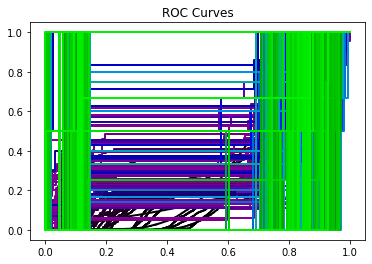

In [29]:
#ROC (Receiver Operating Characteristic curve)
import scikitplot as skplt #to make things easy

y_pred_proba = logi.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.show()